In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
df = pd.read_excel (r'C:\Users\DELL\Downloads\Train_dataset.xlsx')
df1 = pd.read_excel (r'C:\Users\DELL\Downloads\Test_dataset.xlsx')
print (df)
print (df1)

                   City           State    Type  Population [2011]  \
0                Mumbai     Maharashtra     M.C         12442373.0   
1                 Delhi           Delhi     M.C         11007835.0   
2             Bangalore       Karnataka    MPUA          8436675.0   
3             Hyderabad       Telangana    MPUA          6809970.0   
4             Ahmedabad         Gujarat    MPUA          5570585.0   
5               Chennai      Tamil Nadu    MPUA          4681087.0   
6               Chennai      Tamil nadu       T          4646732.0   
7               Kolkata     West Bengal    MPUA          4486679.0   
8                 Surat         Gujarat    MPUA          4467797.0   
9                  Pune     Maharashtra    MPUA          3124458.0   
10               Jaipur       Rajasthan    MPUA          3046163.0   
11              Lucknow   Uttar Pradesh    MPUA          2817105.0   
12               Indore  Madhya Pradesh       M          2800000.0   
13               Kan

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 16 columns):
City                 787 non-null object
State                787 non-null object
Type                 787 non-null object
Population [2011]    739 non-null float64
Popuation [2001]     295 non-null float64
Sex Ratio            777 non-null float64
Median Age           769 non-null float64
Avg Temp             770 non-null float64
SWM                  783 non-null object
Toilets Avl          761 non-null float64
Water Purity         629 non-null float64
H Index              647 non-null float64
Female Population    646 non-null float64
# of hospitals       772 non-null float64
Foreign Visitors     697 non-null float64
Covid Cases          787 non-null int64
dtypes: float64(11), int64(1), object(4)
memory usage: 98.5+ KB


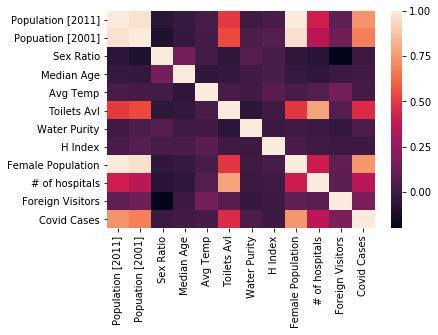

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

In [5]:

df.isnull().sum()

City                   0
State                  0
Type                   0
Population [2011]     48
Popuation [2001]     492
Sex Ratio             10
Median Age            18
Avg Temp              17
SWM                    4
Toilets Avl           26
Water Purity         158
H Index              140
Female Population    141
# of hospitals        15
Foreign Visitors      90
Covid Cases            0
dtype: int64

In [8]:
df1.isnull().sum()

City                   0
State                  0
Type                   2
Population [2011]      6
Popuation [2001]     501
Sex Ratio              5
Median Age            13
Avg Temp              14
SWM                    9
Toilets Avl           22
Water Purity          19
H Index               15
Female Population     15
# of hospitals        17
Foreign Visitors      17
dtype: int64

In [10]:
print(len(df))
print(len(df1))

787
501


In [11]:
print(len(df.City.unique()))
print(len(df.State.unique()))
print(len(df.Type.unique()))
print(len(df.SWM.unique()))

772
33
37
4


In [12]:
df1

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0
5,Ramdurg,Karnataka,UA,36649.0,NaN,942.0,27.0,28.0,MEDIUM,92.0,185.0,0.571883,34523.0,30.0,636502.0
6,Pulgaon,Maharashtra,M.Cl,36522.0,NaN,887.0,26.0,31.0,MEDIUM,72.0,108.0,0.271195,32395.0,11.0,4408916.0
7,Sadasivpet,Telangana,M,36334.0,NaN,921.0,27.0,40.0,LOW,70.0,116.0,0.494227,33464.0,17.0,126078.0
8,Nargund,Karnataka,T.M.C,36291.0,NaN,940.0,23.0,37.0,LOW,77.0,148.0,0.708562,34114.0,21.0,636502.0
9,Neem-Ka-Thana,Rajasthan,M,36231.0,NaN,850.0,25.0,25.0,MEDIUM,61.0,148.0,0.592325,30796.0,29.0,1475311.0


In [13]:
df=df.drop(['City','State','Popuation [2001]'], axis=1)
df1=df1.drop(['City','State','Popuation [2001]'], axis=1)

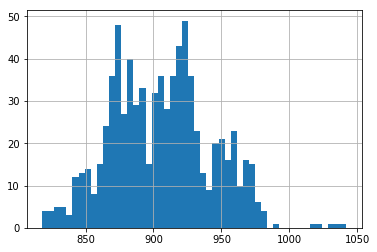

In [14]:
df['Sex Ratio'].hist(bins=50)

In [15]:
mean_sr= df['Sex Ratio'].mean()
df['Sex Ratio'].fillna(mean_sr,inplace=True)
df1['Sex Ratio'].fillna(mean_sr,inplace=True)
df['Sex Ratio'].isnull().sum()

0

In [18]:
df['Sex Ratio']=df['Sex Ratio'].astype('int64')/1000
df1['Sex Ratio']=df1['Sex Ratio'].astype('int64')/1000
df['Sex Ratio']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
757    0.0
758    0.0
759    0.0
760    0.0
761    0.0
762    0.0
763    0.0
764    0.0
765    0.0
766    0.0
767    0.0
768    0.0
769    0.0
770    0.0
771    0.0
772    0.0
773    0.0
774    0.0
775    0.0
776    0.0
777    0.0
778    0.0
779    0.0
780    0.0
781    0.0
782    0.0
783    0.0
784    0.0
785    0.0
786    0.0
Name: Sex Ratio, Length: 787, dtype: float64

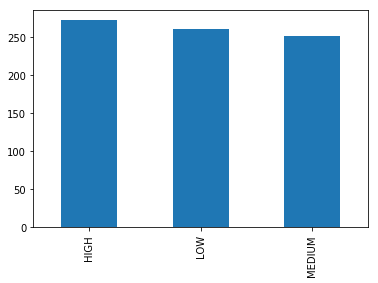

In [19]:
df['SWM'].value_counts().plot.bar()

In [21]:
mode_swm=df['SWM'].mode()
df['SWM'].fillna(mode_swm,inplace=True)
df1['SWM'].fillna(mode_swm,inplace=True)
df['SWM'].isnull().sum()

4

In [23]:
dummies_train  = pd.get_dummies(df['SWM'])
dummies_train.drop(['MEDIUM'],axis=1,inplace=True)

dummies_test  = pd.get_dummies(df1['SWM'])
dummies_test.drop(['MEDIUM'],axis=1,inplace=True)

df = df.join(dummies_train)
df1 = df1.join(dummies_test)

df1.drop(['SWM'],axis=1,inplace=True)
df.drop(['SWM'],axis=1,inplace=True)

In [24]:
df

,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases,HIGH,LOW
0,M.C,12442373.0,0.0,23.0,32.0,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115,0,0
1,M.C,11007835.0,0.0,27.0,30.0,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188,0,0
2,MPUA,8436675.0,0.0,28.0,37.0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000,1,0
3,MPUA,6809970.0,0.0,23.0,31.0,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123,0,0
4,MPUA,5570585.0,0.0,29.0,25.0,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204,0,1
5,MPUA,4681087.0,0.0,26.0,31.0,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606,1,0
6,T,4646732.0,0.0,26.0,30.0,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606,0,0
7,MPUA,4486679.0,0.0,26.0,37.0,NaN,NaN,0.473585,4239912.0,82.0,1489500.0,44957,0,0
8,MPUA,4467797.0,0.0,27.0,26.0,NaN,NaN,0.809334,3797627.0,98.0,284973.0,23432,0,0
9,MPUA,3124458.0,0.0,29.0,29.0,NaN,NaN,0.445902,2743274.0,50.0,4408916.0,218502,0,0


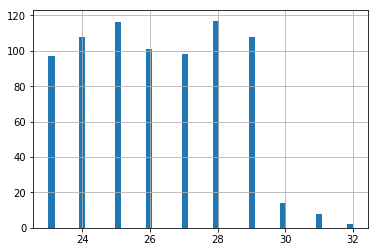

In [25]:
df['Median Age'].hist(bins=50)

In [27]:
median_age=df['Median Age'].median()
df['Median Age'].fillna(median_age,inplace=True)
df1['Median Age'].fillna(median_age,inplace=True)
df['Median Age'].isnull().sum()

0

In [30]:
df['Median Age']=df['Median Age'].astype('int64')
df1['Median Age']=df1['Median Age'].astype('int64')

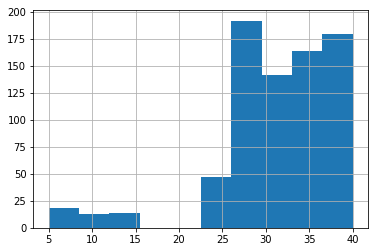

In [31]:
df['Avg Temp'].hist(bins=10)

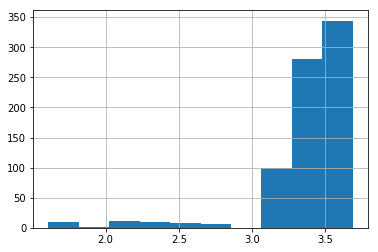

In [32]:
F= np.log(df['Avg Temp'])
F.hist(bins=10)

In [33]:
mean_temp=df['Avg Temp'].mean()

df['Avg Temp'].fillna(mean_temp,inplace=True)
df1['Avg Temp'].fillna(mean_temp,inplace=True)
df['Avg Temp'].isnull().sum()

0

In [35]:
df['Avg Temp']=df['Avg Temp'].astype('int64')
df1['Avg Temp']=df1['Avg Temp'].astype('int64')

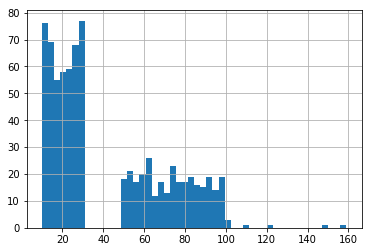

In [36]:
df['# of hospitals'].hist(bins=50)

In [37]:
df['# of hospitals'].fillna(np.random.randint(low=10, high=30),inplace=True)
df1['# of hospitals'].fillna(np.random.randint(low=10, high=30),inplace=True)
df['# of hospitals'].isnull().sum()

0

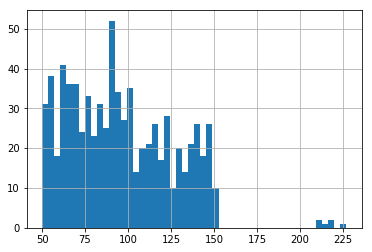

In [38]:
df['Toilets Avl'].hist(bins=50)

In [39]:
mean_toilet=df['Toilets Avl'].mean()

df['Toilets Avl'].fillna(mean_toilet,inplace=True)
df1['Toilets Avl'].fillna(mean_toilet,inplace=True)
df['Toilets Avl'].isnull().sum()

0

In [41]:
df['Toilets Avl']=df['Toilets Avl'].astype('int64')
df1['Toilets Avl']=df1['Toilets Avl'].astype('int64')

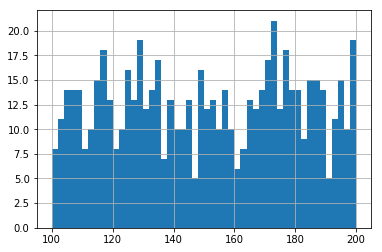

In [42]:
df['Water Purity'].hist(bins=50)

In [43]:
mean_water=df['Water Purity'].mean()
df['Water Purity'].fillna(mean_water,inplace=True)
df1['Water Purity'].fillna(mean_water,inplace=True)
df['Water Purity'].isnull().sum()

0

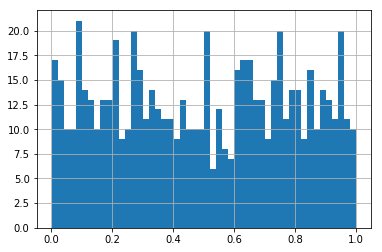

In [44]:
df['H Index'].hist(bins=50)

In [47]:
mean_index=df['H Index'].mean()
df['H Index'].fillna(mean_index,inplace=True)
df1['H Index'].fillna(mean_index,inplace=True)
df['H Index'].isnull().sum()

0

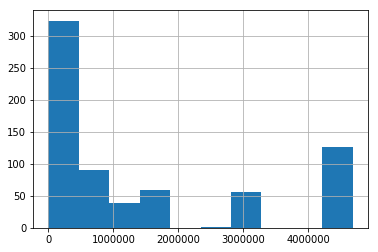

In [48]:
df['Foreign Visitors'].hist(bins=10)

In [49]:
max_viz=df['Foreign Visitors'].max()
min_viz=df['Foreign Visitors'].min()
min_viz

798.0

In [50]:
df['Foreign Visitors'].fillna(np.random.randint(low=100000, high=1000000),inplace=True)
df1['Foreign Visitors'].fillna(np.random.randint(low=100000, high=1000000),inplace=True)
df['Foreign Visitors'].isnull().sum()

0

In [51]:
df['Foreign Visitors']=df['Foreign Visitors'].astype('int64')
df1['Foreign Visitors']=df1['Foreign Visitors'].astype('int64')

In [52]:

df.head(5)

,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases,HIGH,LOW
0,M.C,12442373.0,0.0,23,32,219,150.0,0.700440,10924403.0,159.0,4408916,163115,0,0
1,M.C,11007835.0,0.0,27,30,215,196.0,0.920018,9444722.0,148.0,2379169,80188,0,0
2,MPUA,8436675.0,0.0,28,37,212,102.0,0.097085,7896728.0,123.0,636502,141000,1,0
3,MPUA,6809970.0,0.0,23,31,217,118.0,0.827744,6333272.0,110.0,126078,55123,0,0
4,MPUA,5570585.0,0.0,29,25,227,109.0,0.847941,4746138.0,73.0,284973,33204,0,1


In [53]:

df1.head(5)

,Type,Population [2011],Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,HIGH,LOW
0,T.C,36774.0,0.931,23,10,94,114.0,0.253390,34237.0,17.0,2769,0,0
1,T.M.C,36754.0,0.934,25,38,62,160.0,0.192555,34328.0,13.0,636502,1,0
2,M.Cl.,36732.0,0.883,29,35,63,105.0,0.887882,32434.0,17.0,242367,1,0
3,M.Cl,36706.0,0.887,26,31,60,174.0,0.407838,32558.0,11.0,4408916,1,0
4,N.P.,36669.0,0.877,28,39,92,153.0,0.324456,32159.0,23.0,3104060,0,1


In [57]:
writer = pd.ExcelWriter('hackathon1.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1')
writer.save()

In [58]:
writer = pd.ExcelWriter('hackathon2.xlsx', engine='xlsxwriter')
df1.to_excel(writer, sheet_name='Sheet1')
writer.save()